## Code to generate Figure 4A-B graphics
Plots of net charge per residue (NCPR) for Ash1/pAsh1 and PAGE4/pPAGE4 were generated using 'localcider'. Phosphomimetic subsitutions to the desired phosphosites were used to reflect the negative charge of the phosphoryl group (z = -1). For each sequence in the files 'ash1_seqs.txt' and 'page4_seqs.txt', phosphosites are designated with 'x'; each 'x' in the sequence is converted to an aspartate ('D') prior to NCPR calculation.

This code calculates NCPR profiles for all phospho-forms of Ash1 and PAGE4 discussed in this paper (see Tables S4 and S5 for sequences), but only the unmodified and fully phosphorylated forms are presented in Figure 4A-B, so only these graphics are generated by this script.

This code loads text files from 'data/'.

In [2]:
import numpy as np
from localcider.sequenceParameters import SequenceParameters

import matplotlib.pyplot as plt

In [12]:
## function to batch-replace phosphosite 'x' with 'D' & calculate NCPR ##
# sequences == array of dtype = 'str' containing protein sequences
# blob == (int) sets the size of the window used for the calculations (usually == 5)
#
# returns: per-residue NCPR values (floats) for each sequence in the input array

def batch_NCPR(sequences, blob):
    
    NCPRs = np.empty((0, len(sequences[0])))
    
    for line in range(0, len(sequences)):
        seq = sequences[line]
        pmim = seq.replace('x', 'D')
        poi = SequenceParameters(pmim)
        NCPR_poi = poi.get_linear_NCPR(blobLen = blob)[1]
        
        NCPRs = np.vstack([NCPRs, NCPR_poi])
        
    return NCPRs
    

### Ash1 & pAsh1

In [13]:
## load files with protein sequences as strings ##
ash1_seqs = np.genfromtxt('data/ash1_seqs.txt', dtype = 'str')

In [14]:
## calculate NCPR for Ash1 phospho-forms ##

ash1_ncpr = batch_NCPR(ash1_seqs, 5)

residue = np.arange(1, len(ash1_seqs[0]) + 1)

# uncomment following line to write out NCPR values to a text file 
# np.savetxt('ash1_ncpr.txt', ash1_ncpr, fmt = '%f')

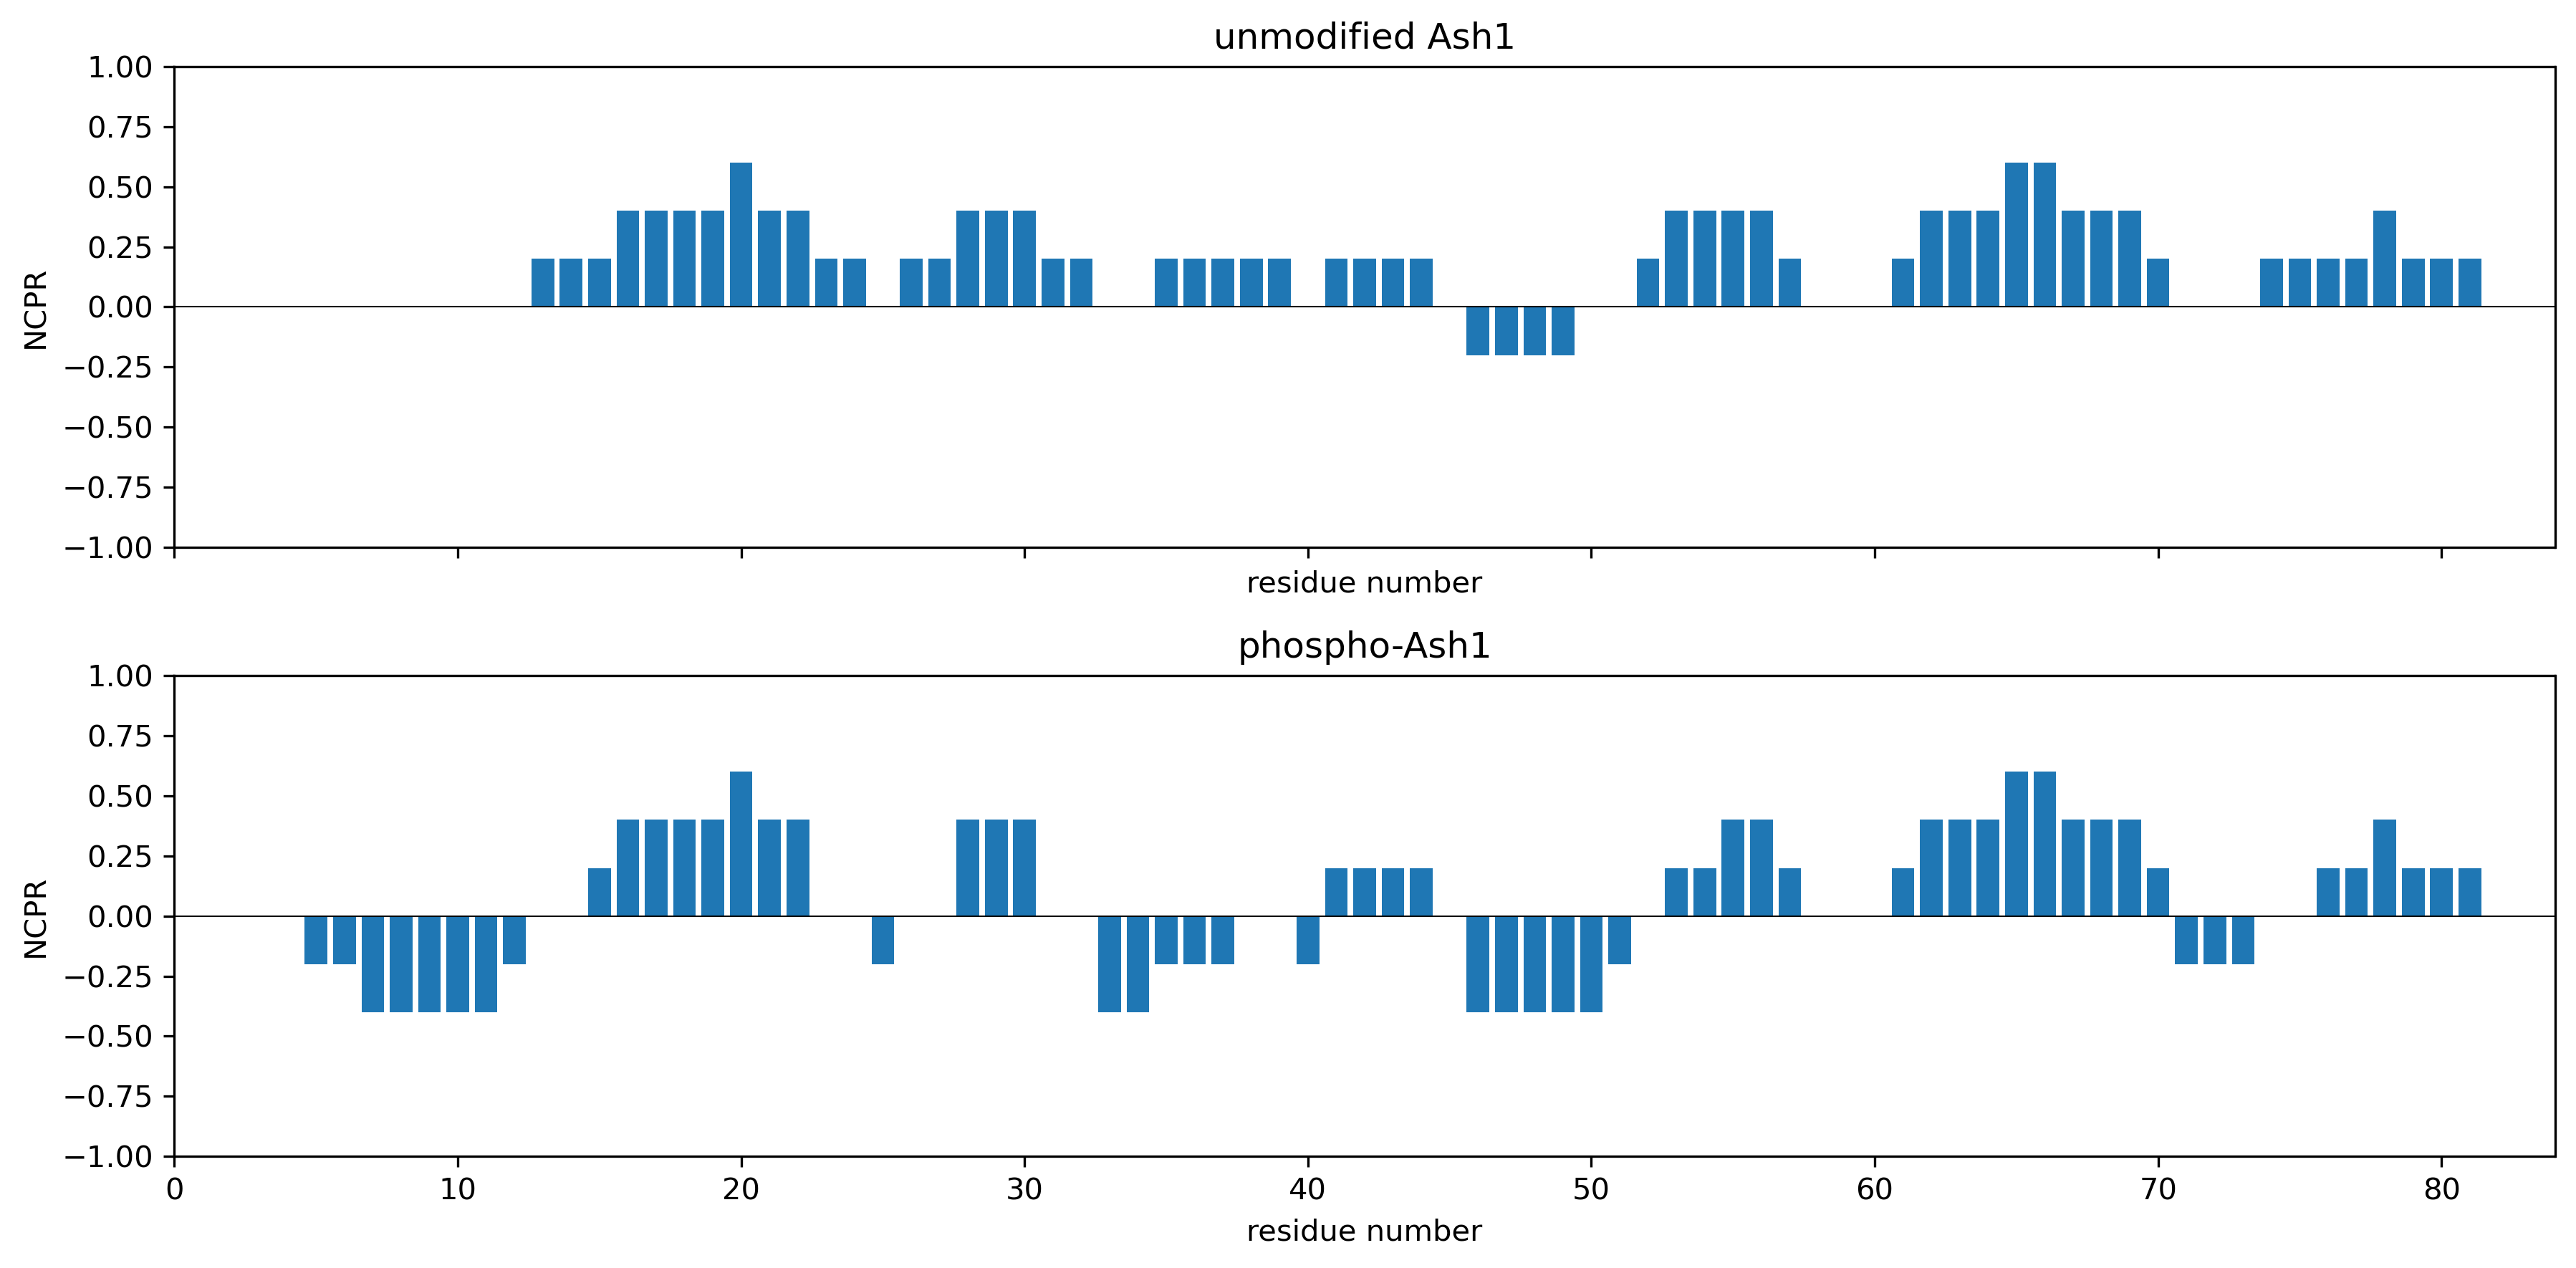

In [25]:
## generate plots of Ash1 and pAsh1 net charge per residue (PANEL A) ##

fig, axes = plt.subplots(nrows = 2, sharex = True, figsize = (12, 6), dpi = 300)
plt.subplots_adjust(hspace = 0.5)

# for unmodified Ash1:
axes[0].bar(residue, ash1_ncpr[0])
axes[0].axhline(y = 0, lw = 0.5, color = 'k')
axes[0].set_title('unmodified Ash1')
axes[0].set_ylim([-1, 1])
axes[0].set_xlim([0, max(residue)+1])
axes[0].set_ylabel('NCPR')
axes[0].set_xlabel('residue number')

# for 'phosphorylated' Ash1
axes[1].bar(residue, ash1_ncpr[1])
axes[1].axhline(y = 0, lw = 0.5, color = 'k')
axes[1].set_title('phospho-Ash1')
axes[1].set_ylim([-1, 1])
axes[1].set_xlim([0, max(residue)+1])
axes[1].set_ylabel('NCPR')
axes[1].set_xlabel('residue number')

plt.tight_layout()

plt.savefig('Ash1_linNCPR_4A.pdf', format = 'pdf', dpi = 300)

plt.show()   

### PAGE4 & pPAGE4

In [26]:
## load another file with protein sequences as strings ##
page4_seqs = np.genfromtxt('data/page4_seqs.txt', dtype = 'str')

In [27]:
## calculate NCPR for PAGE4 phospho-forms ##

page4_ncpr = batch_NCPR(page4_seqs, 5)

residue = np.arange(1, len(page4_seqs[0]) + 1)

# uncomment following line to write out NCPR values to a text file 
# np.savetxt('page4_ncpr.txt', ash1_ncpr, fmt = '%f')

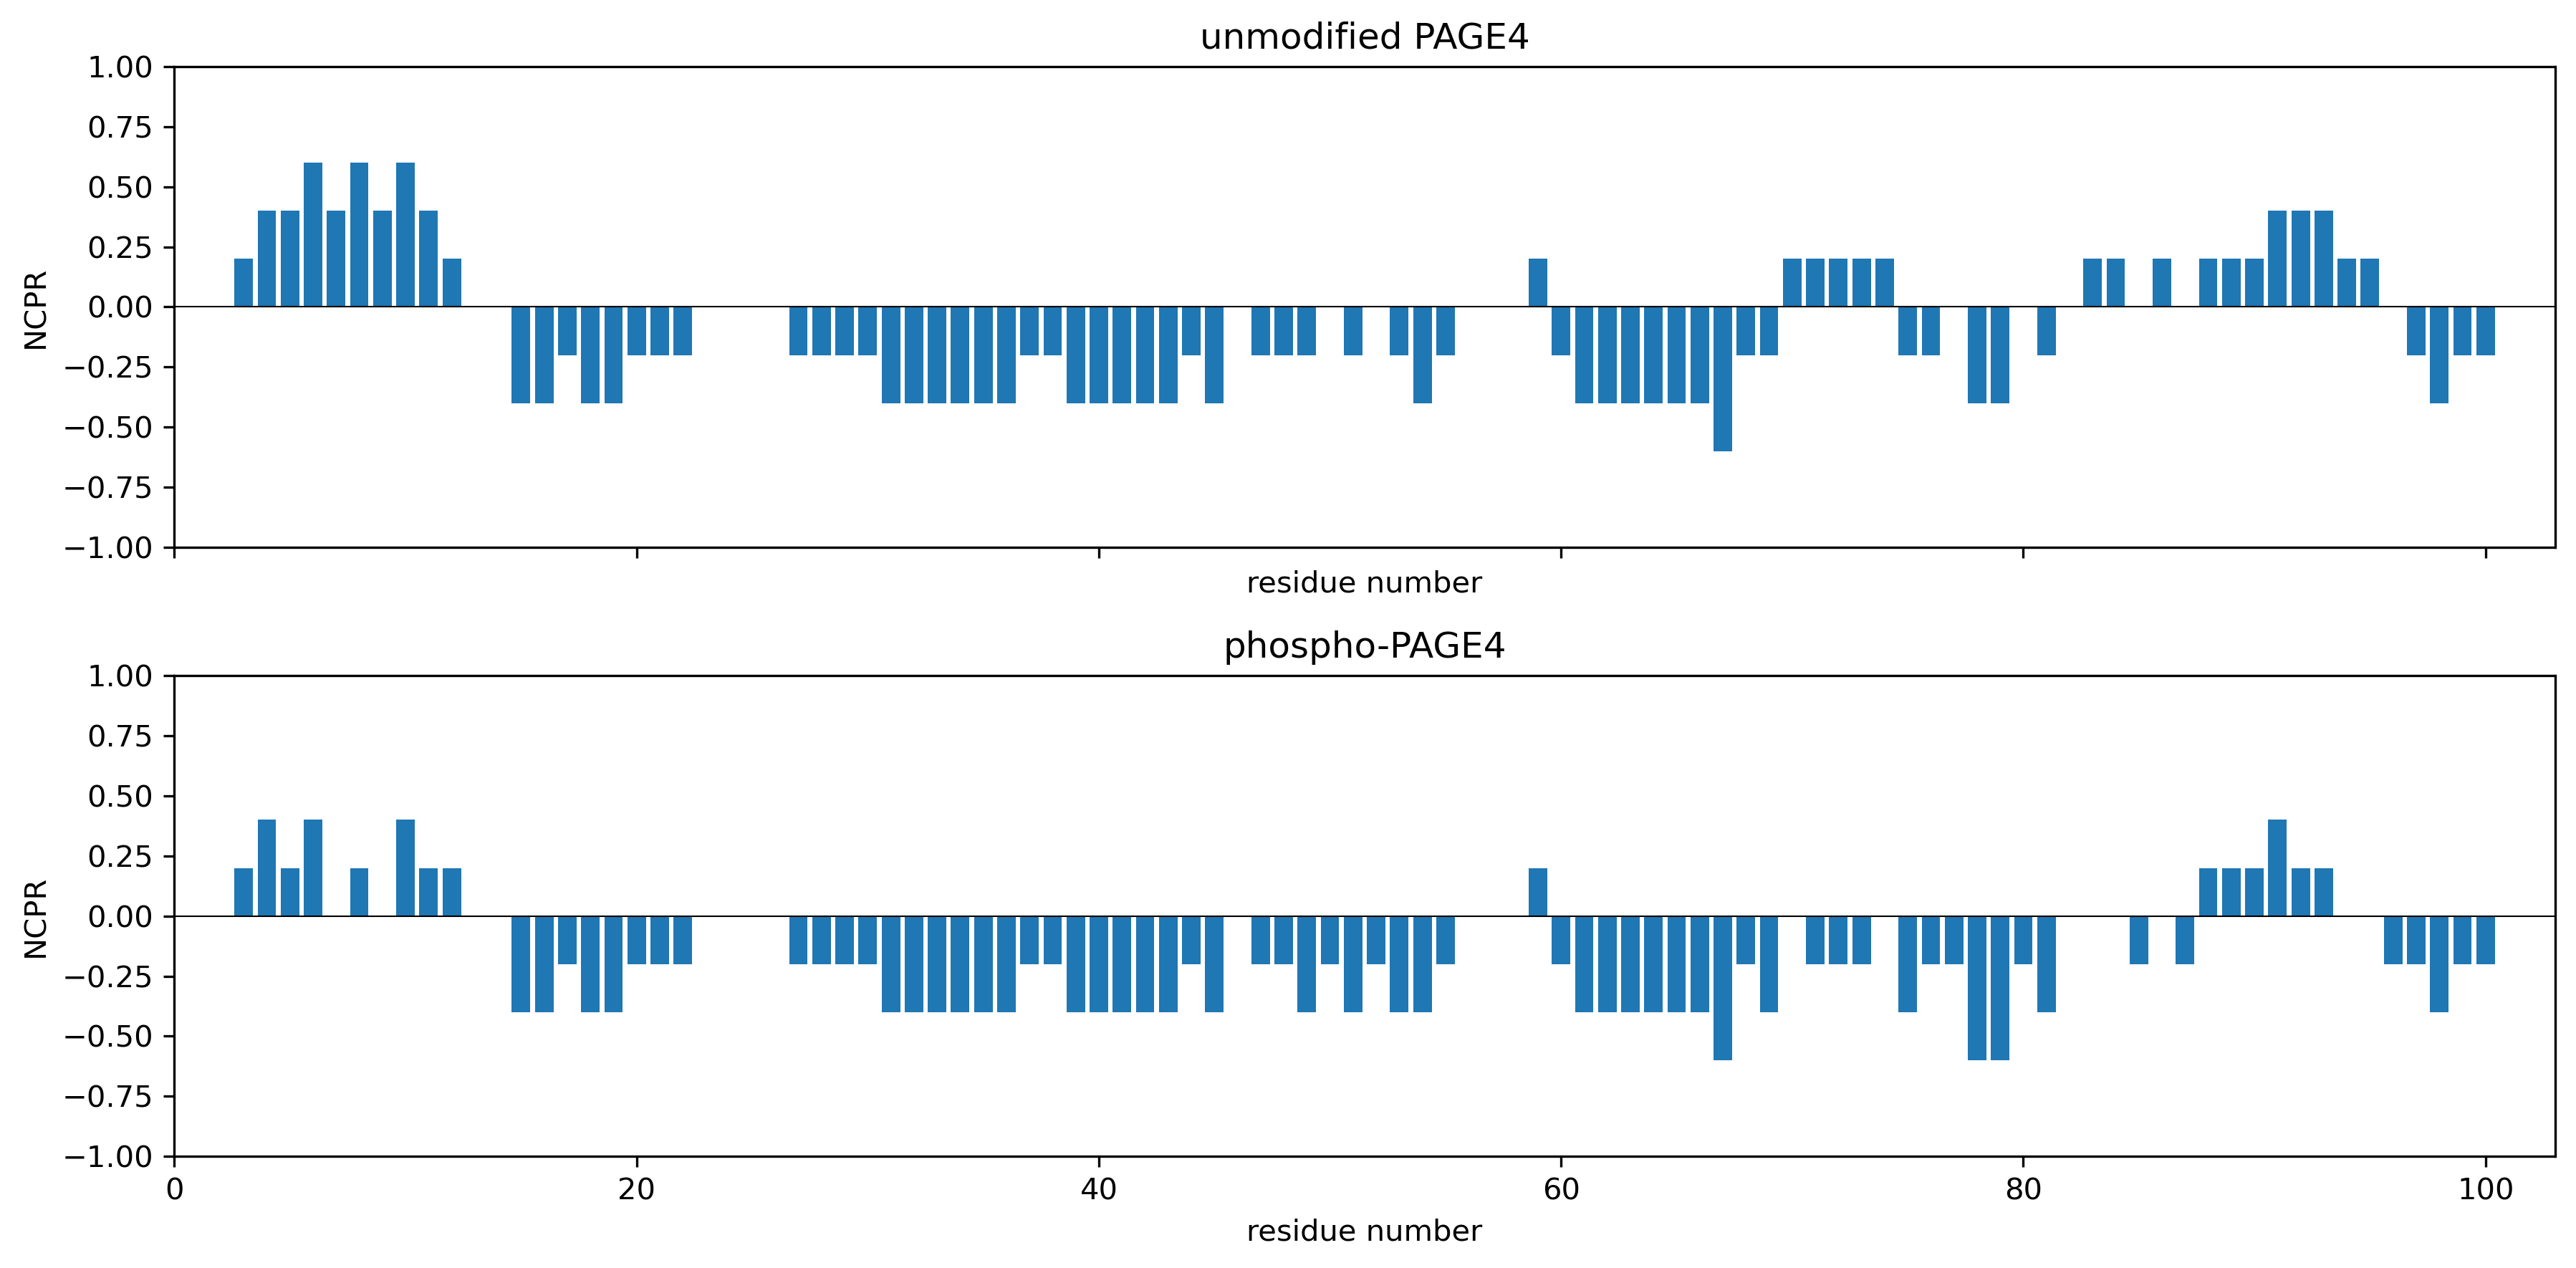

In [30]:
## generate plots of PAGE4 and pPAGE4 net charge per residue (PANEL B) ##

fig, axes = plt.subplots(nrows = 2, sharex = True, figsize = (12, 6), dpi = 300)
plt.subplots_adjust(hspace = 0.5)

# for unmodified PAGE (idx 0):
axes[0].bar(residue, page4_ncpr[0])
axes[0].axhline(y = 0, lw = 0.5, color = 'k')
axes[0].set_title('unmodified PAGE4')
axes[0].set_ylim([-1, 1])
axes[0].set_xlim([0, max(residue)+1])
axes[0].set_ylabel('NCPR')
axes[0].set_xlabel('residue number')

# for 'phosphorylated' PAGE4 (idx 2)
axes[1].bar(residue, page4_ncpr[2])
axes[1].axhline(y = 0, lw = 0.5, color = 'k')
axes[1].set_title('phospho-PAGE4')
axes[1].set_ylim([-1, 1])
axes[1].set_xlim([0, max(residue)+1])
axes[1].set_ylabel('NCPR')
axes[1].set_xlabel('residue number')

plt.tight_layout()

plt.savefig('PAGE4_linNCPR_4B.pdf', format = 'pdf', dpi = 300)

plt.show()   